In [8]:
#  import packages
import numpy as np
import xarray as xr
import scipy.signal

import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.animation import FuncAnimation

In [9]:
# open dataset
ds = xr.open_dataset('IVKE2019_daily.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 365, lat: 361, lon: 576)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables:
    IVKE     (time, lat, lon) float32 ...
    AR       (time, lat, lon) int8 ...

In [10]:
# set colorbar
def make_colorbar(ax, mappable, **kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib as mpl

    divider = make_axes_locatable(ax)
    orientation = kwargs.pop('orientation', 'vertical')
    label = kwargs.pop('label',None)
    if orientation == 'vertical':
        loc = 'right'
    elif orientation == 'horizontal':
        loc = 'bottom'
        
    cax = divider.append_axes(loc, '5%', pad='3%', axes_class=mpl.pyplot.Axes)
    ax.get_figure().colorbar(mappable, cax=cax, orientation=orientation, label=label)


In [16]:
# calculate monthly-averaged AR frequency 
ar = ds.AR.groupby("time.month").mean(dim = "time")

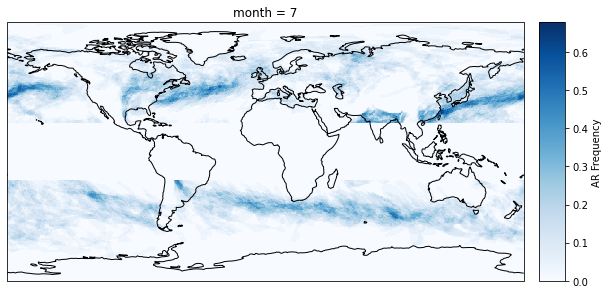

In [19]:
# produce a movie showing the global map of AR frequency in different months
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(projection=crs)
plot = ar.isel(month=6).plot(ax=ax, add_colorbar=False, cmap='Blues')
ax.coastlines()

make_colorbar(ax, plot, orientation='vertical', label='AR Frequency')


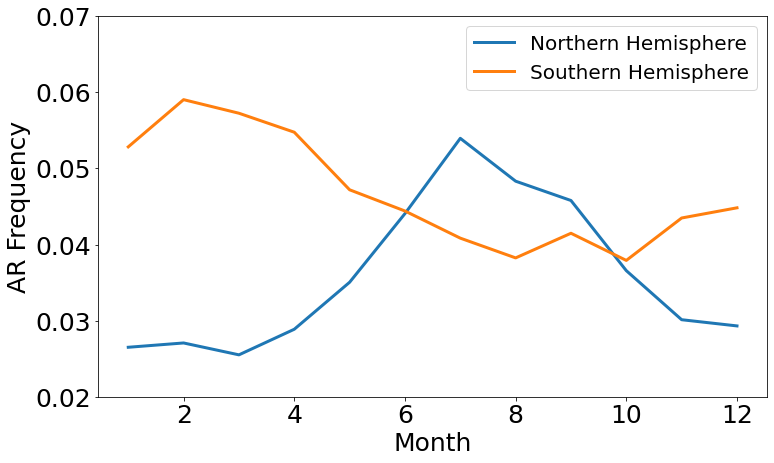

In [72]:
# plot how AR frequency change with months
fig1 = plt.figure(figsize=(12,7))
ax1 = plt.subplot()
North_ar = ds.AR[:,180:361,:].mean(dim = ("lon","lat"))  # numbers 180:361 represent the northern hemisphere
line1 = North_ar.groupby("time.month").mean().plot(lw = 3, label = "Northern Hemisphere")
South_ar = ds.AR[:,0:180,:].mean(dim = ("lon","lat"))  # numbers 0:180 represent the southern hemisphere
line2 = South_ar.groupby("time.month").mean().plot(lw = 3, label = "Southern Hemisphere")

plt.ylabel('AR Frequency', fontsize = 25)
plt.xlabel('Month', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(loc="upper right", fontsize = 20)
plt.ylim(0.02, 0.07)
plt.savefig('HemisphereAR.png')

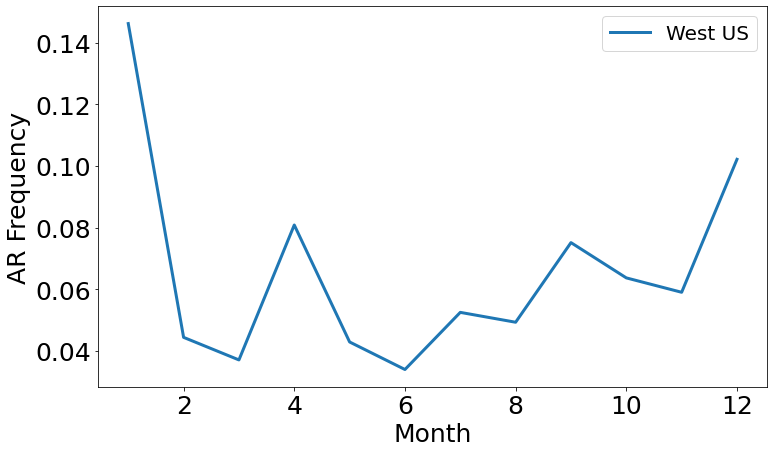

In [73]:
# Feel free to copy and change this section
fig = plt.figure(figsize=(12,7))
ax = plt.subplot()

# choose any latitude and longitude ranges you are interested!!!
# here i choose 35N-50N and 135W-120W, which is West U.S. 
# numbers are latitudes or longitudes
tmp = ds.AR.sel(lat=slice(35,50), lon = slice(-135,-120)).mean(dim = ("lon","lat"))     


line = tmp.groupby("time.month").mean().plot(lw = 3, label = "West US")  # change the name of the region here!!

plt.ylabel('AR Frequency', fontsize = 25)
plt.xlabel('Month', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(loc="upper right", fontsize = 20)
# plt.ylim(0.02, 0.07)
plt.savefig('westUSAR.png')